This notebook investigates the effect of the chain length of a sample and the ensemble size that is subsampled. We look at the accuracies with respect to the precalculated PMF of the Bradley Terry distribution .

These notebooks provide some empirical evidence that for a fixed number of candidates that there isn't much dependence on the spacing for even subsampling. We also see the effects of continuous sampling, namely with 100, 1000, and 10000, where there are slight increases to the error. 

In [1]:
import sys
import os

# Add the repo root to sys.path
repo_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

from src.votekit.ballot_generator import name_BradleyTerry 
from src.votekit.pref_interval import PreferenceInterval
from src.votekit.pref_profile import PreferenceProfile
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [3]:
def generate_BT_args(n_cands, alpha=1):
    '''
        generates arguments for name_BradleyTerry with n_cands,
        generates single slate and single bloc, 
    '''
    # num cands goes up to 26
    cands = [chr(ord('a')+i) for i in range(n_cands)]
    bloc_name = "H"
    pref_interval = PreferenceInterval.from_dirichlet(candidates=cands, alpha=alpha)
    pref_intervals_by_bloc = {
        bloc_name: {
            bloc_name : pref_interval
        }
    }
    bloc_voter_prop = {bloc_name: 1}
    cohesion_paramteters = {
        bloc_name: {
            bloc_name: 1
        }
    }
    
    return {
        "candidates": cands,
        "pref_intervals_by_bloc": pref_intervals_by_bloc,
        "bloc_voter_prop" : bloc_voter_prop,
        "cohesion_parameters": cohesion_paramteters
    }

def total_variation_distance(P, Q, labels):
    sum = 0 
    for x in labels:
        sum += abs(P[x] - Q[x])
    return (1/2)*sum

In [4]:
# Initialize a version of BT w/ 5 candidates 
n_cands = 5
bt = name_BradleyTerry(**generate_BT_args(n_cands=n_cands, alpha=1))

# Get the precomputed PMF
new_ranking = {}
for key in bt.pdfs_by_bloc['H'].keys():
    new_ranking[''.join(key)] = bt.pdfs_by_bloc['H'][key]



In [6]:
# Initialize interested parameters --- size of chain and size of ensemble 
num_ballots_arr = [int(10e1), int(10e2), int(10e3), int(10e4), int(10e5), int(10e6)]
size_of_ensembles = [100, 1000, 10000]

verbose = True # Print graphs? 

In [ ]:
## Note, for ensemble sizes greater than the chain length, it returns back the continuous sampling (I think?) 

  0%|                                                                                                                                 | 0/6 [00:00<?, ?it/s]

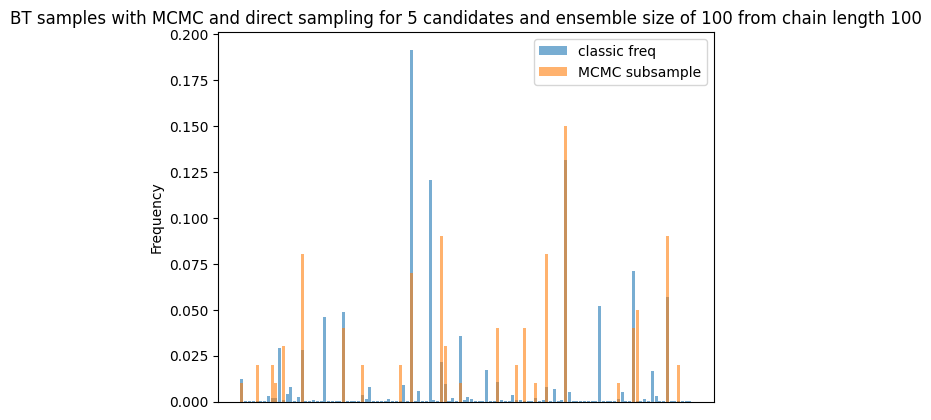

The TV for chain length 100 and subsample size 100 is 0.5523409295269925.


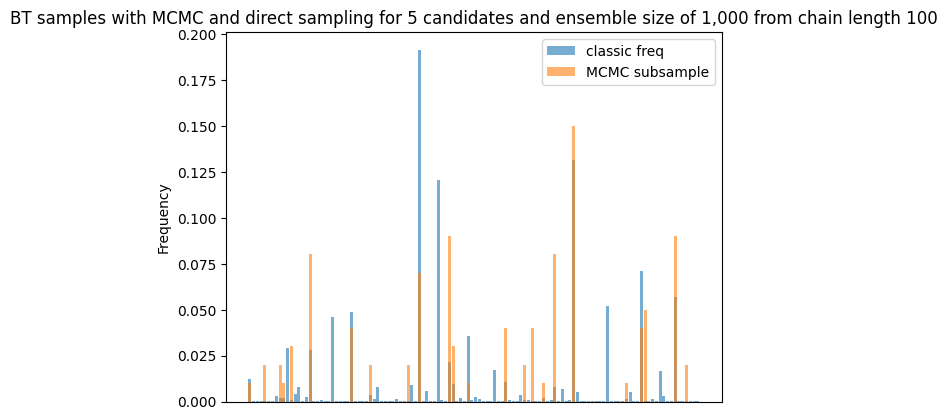

The TV for chain length 100 and subsample size 1000 is 0.5523409295269925.


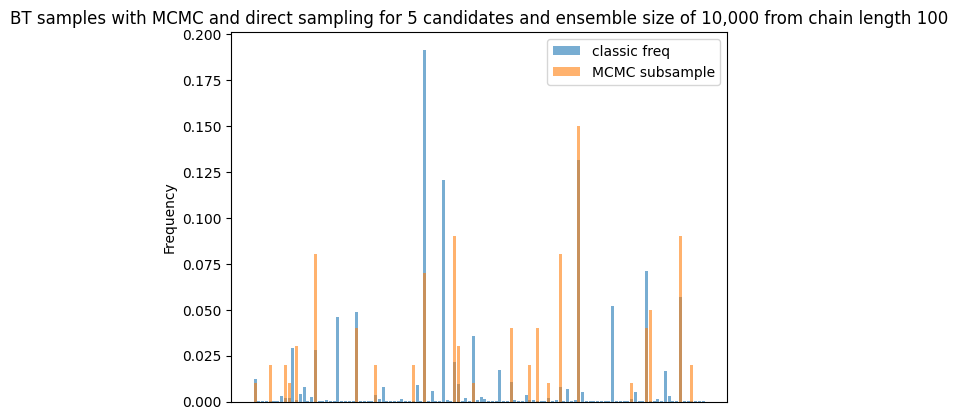

 17%|████████████████████▏                                                                                                    | 1/6 [00:12<01:01, 12.36s/it]

The TV for chain length 100 and subsample size 10000 is 0.5523409295269925.


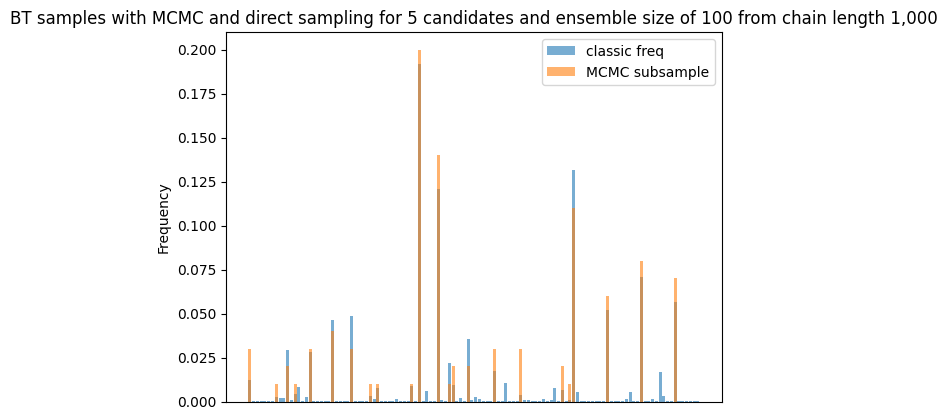

The TV for chain length 1000 and subsample size 100 is 0.1732176728841855.


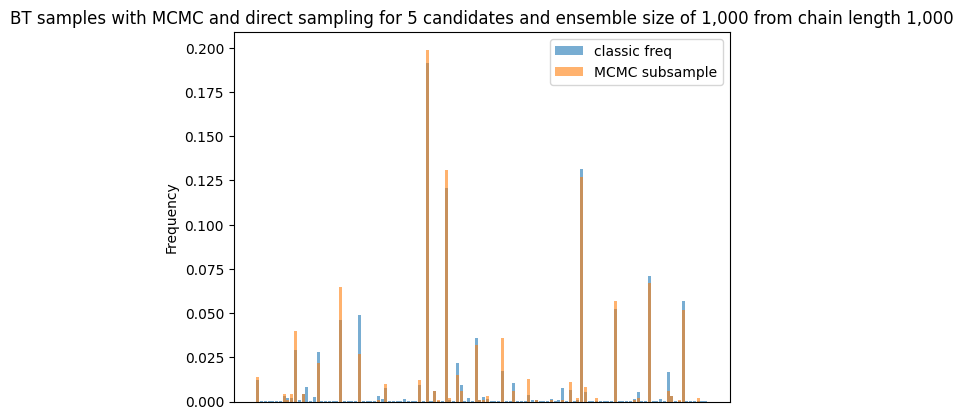

The TV for chain length 1000 and subsample size 1000 is 0.10876713650759377.


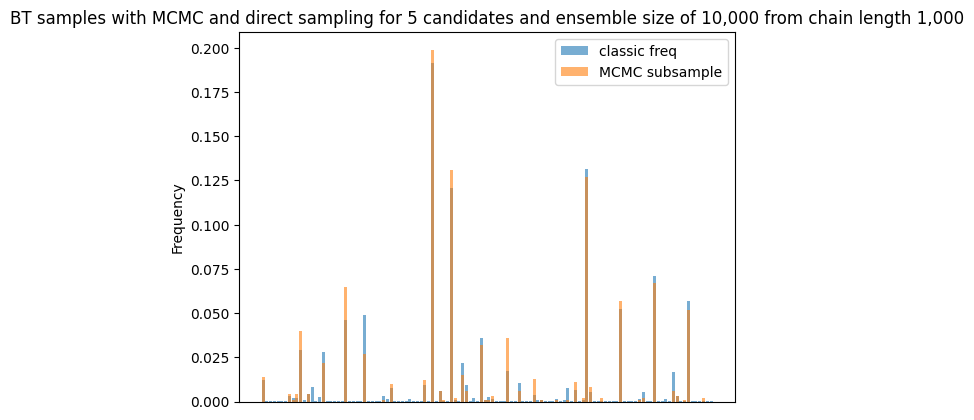

 33%|████████████████████████████████████████▎                                                                                | 2/6 [00:13<00:22,  5.54s/it]

The TV for chain length 1000 and subsample size 10000 is 0.10876713650759377.


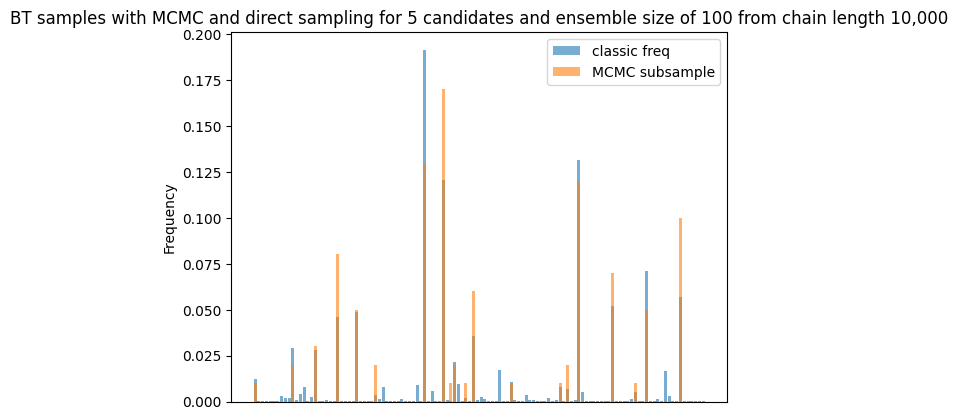

The TV for chain length 10000 and subsample size 100 is 0.22673259249521066.


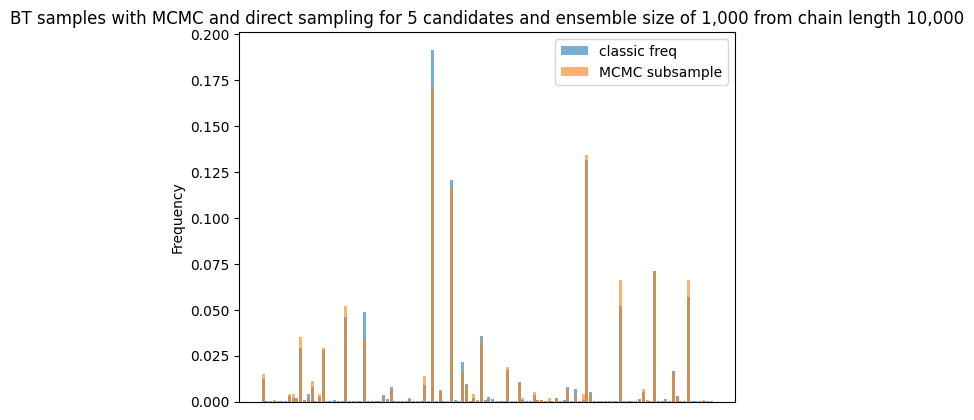

The TV for chain length 10000 and subsample size 1000 is 0.07264301063730459.


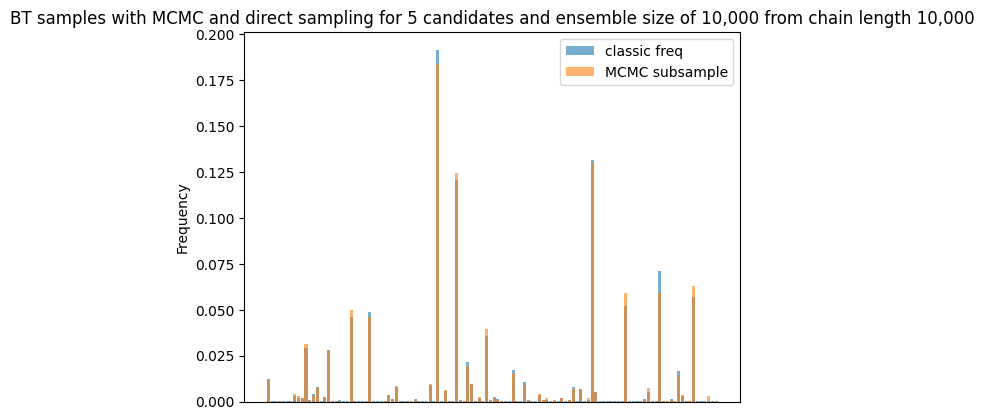

 50%|████████████████████████████████████████████████████████████▌                                                            | 3/6 [00:13<00:10,  3.39s/it]

The TV for chain length 10000 and subsample size 10000 is 0.041374999429048.


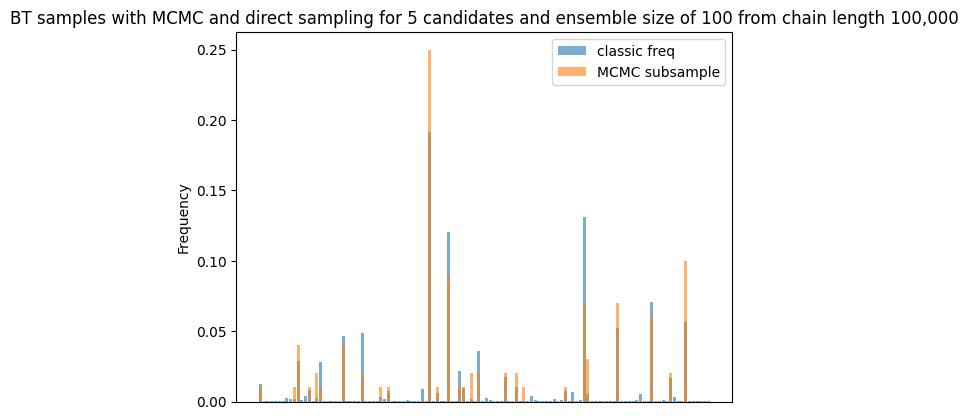

The TV for chain length 100000 and subsample size 100 is 0.24263325621250664.


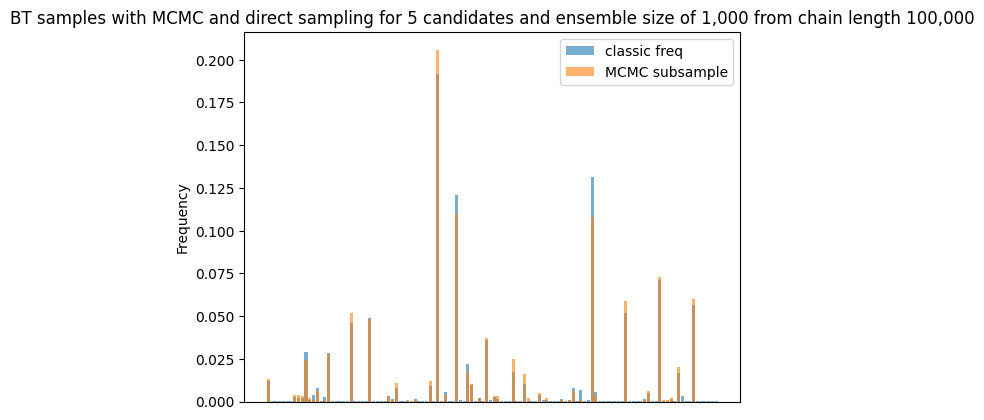

The TV for chain length 100000 and subsample size 1000 is 0.07415671370300146.


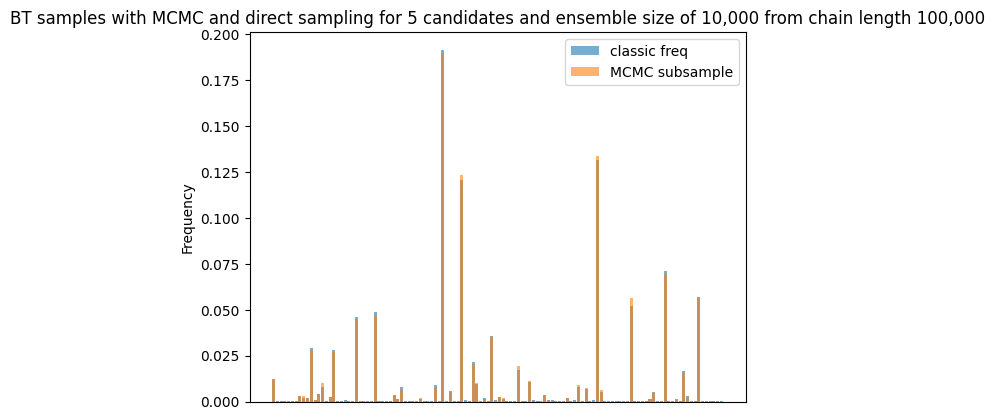

 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 4/6 [00:15<00:05,  2.73s/it]

The TV for chain length 100000 and subsample size 10000 is 0.0219412220484589.


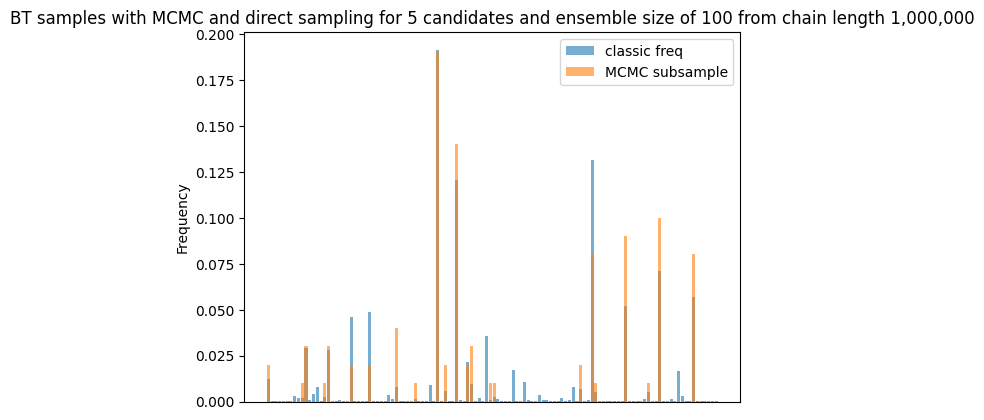

The TV for chain length 1000000 and subsample size 100 is 0.25120419560591023.


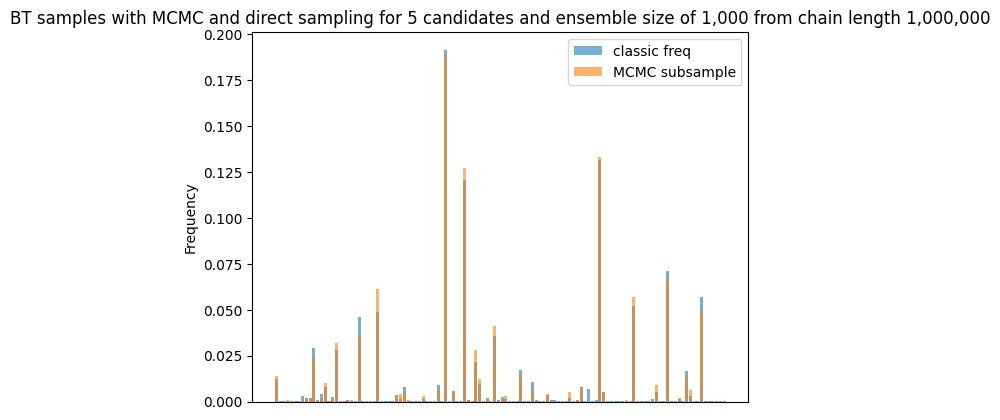

The TV for chain length 1000000 and subsample size 1000 is 0.06935650720930228.


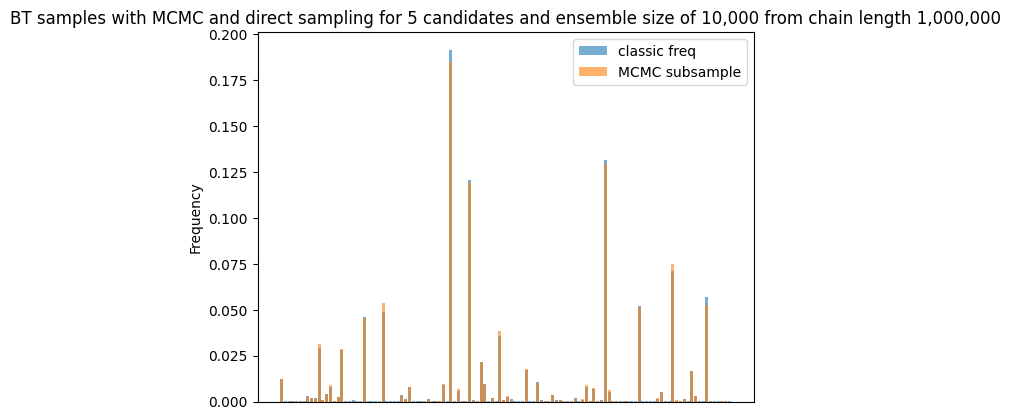

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 5/6 [00:28<00:06,  6.23s/it]

The TV for chain length 1000000 and subsample size 10000 is 0.023013008472286968.


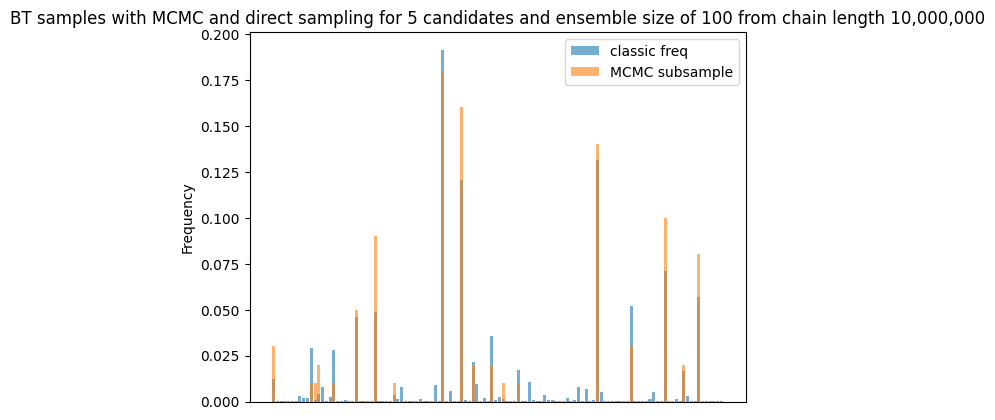

The TV for chain length 10000000 and subsample size 100 is 0.20752077238266056.


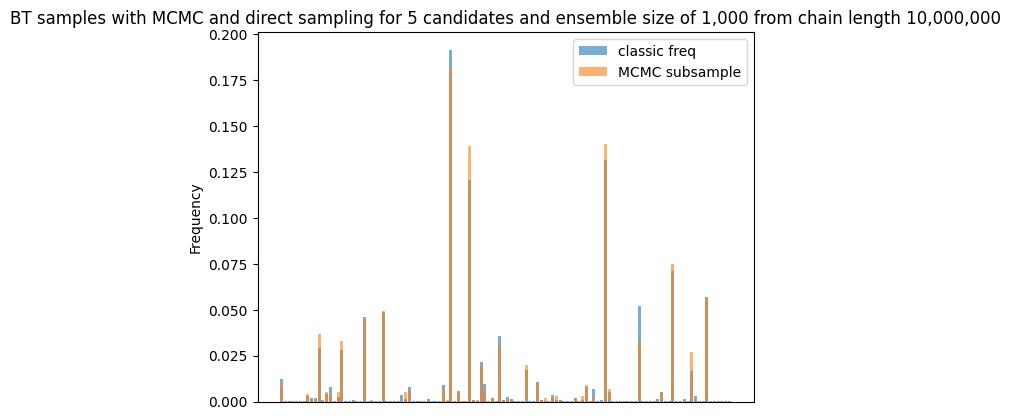

The TV for chain length 10000000 and subsample size 1000 is 0.07975778677181497.


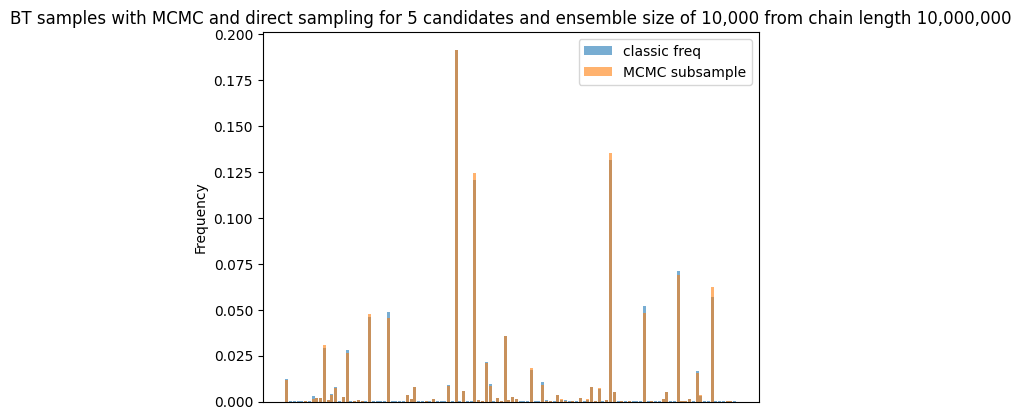

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:34<00:00, 55.81s/it]

The TV for chain length 10000000 and subsample size 10000 is 0.02205975426694612.


In [30]:
results = np.zeros((len(num_ballots_arr), len(size_of_ensembles)))
for k in tqdm(range(len(num_ballots_arr))):
    bals_BT_MCMC_all_samples_ballots = bt.generate_profile_MCMC_arr_ballots(num_ballots_arr[k])
    for j in range(len(size_of_ensembles)):
        # Subsample 
        bals_BT_MCMC_subsample_ballots = [bals_BT_MCMC_all_samples_ballots[i*num_ballots_arr[k]//size_of_ensembles[j] + num_ballots_arr[k]//(2*size_of_ensembles[j])] for i in range(size_of_ensembles[j])]

        # Convert back to PreferenceProfile object 
        bals_BT_MCMC_subsample = PreferenceProfile(ballots=bals_BT_MCMC_subsample_ballots).group_ballots()

        # Transform subsample so labels are well defined 
        ballot_rankings_MCMC_subsample = [bal.ranking for bal in bals_BT_MCMC_subsample.ballots]
        bal_labels_MCMC_subsample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_subsample]
        bal_weights_MCMC_subsample = [int(bal.weight) for bal in bals_BT_MCMC_subsample.ballots]

        bal_rankings_map_MCMC_subsample = {bal_labels_MCMC_subsample[i]: bal_weights_MCMC_subsample[i]/size_of_ensembles[j] for i in range(len(ballot_rankings_MCMC_subsample))}
        
        x_labels = list(new_ranking.keys())
        # TODO: Some redundancy here, simplify
        all_keys = [list(m.keys()) for m in [
            new_ranking, bal_rankings_map_MCMC_subsample
        ]]
        flattened_keys = [k for sublist in all_keys for k in sublist]
        
        for key in flattened_keys:
            new_ranking.setdefault(key, 0) 
            bal_rankings_map_MCMC_subsample.setdefault(key, 0)
        
        all_keys = list(set(new_ranking) | set(bal_rankings_map_MCMC_subsample))

        results[k][j] = total_variation_distance(new_ranking, bal_rankings_map_MCMC_subsample, all_keys)

        if verbose: 
            plt.bar(all_keys, [new_ranking[k] for k in all_keys], label="classic freq", alpha=0.6)
            plt.bar(all_keys, [bal_rankings_map_MCMC_subsample[k] for k in all_keys], label="MCMC subsample", alpha=0.6)
            # plt.xticks(rotation=45, ha='right', fontsize=6)
            plt.xticks([]) # Hide the x labels if there are too many candidates to display
            plt.legend()
            plt.ylabel("Frequency")
            plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and ensemble size of {size_of_ensembles[j]:,} from chain length {num_ballots_arr[k]:,}")
            plt.show()
            print(f'The TV for chain length {num_ballots_arr[k]} and subsample size {size_of_ensembles[j]} is {results[k][j]:2d}.')

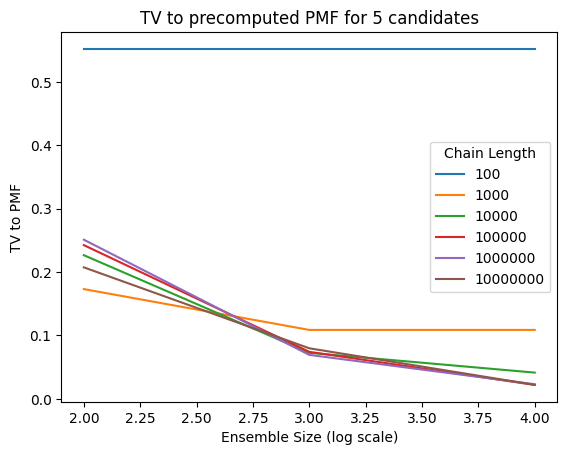

In [31]:
for i in range(len(num_ballots_arr)):
    plt.plot([math.log10(j) for j in size_of_ensembles], results[i][::], label = f'{num_ballots_arr[i]}')
plt.xlabel('Ensemble Size (log scale)')
plt.ylabel(f'TV to PMF')
plt.title(f'TV to precomputed PMF for {n_cands} candidates')
legend = plt.legend()
legend.set_title('Chain Length')
plt.show()

## $n = 6$

In [32]:
# Initialize a version of BT w/ 5 candidates 
n_cands = 6
bt = name_BradleyTerry(**generate_BT_args(n_cands=n_cands, alpha=1))

# Get the precomputed PMF
new_ranking = {}
for key in bt.pdfs_by_bloc['H'].keys():
    new_ranking[''.join(key)] = bt.pdfs_by_bloc['H'][key]



  0%|                                                                                                                                 | 0/6 [00:00<?, ?it/s]

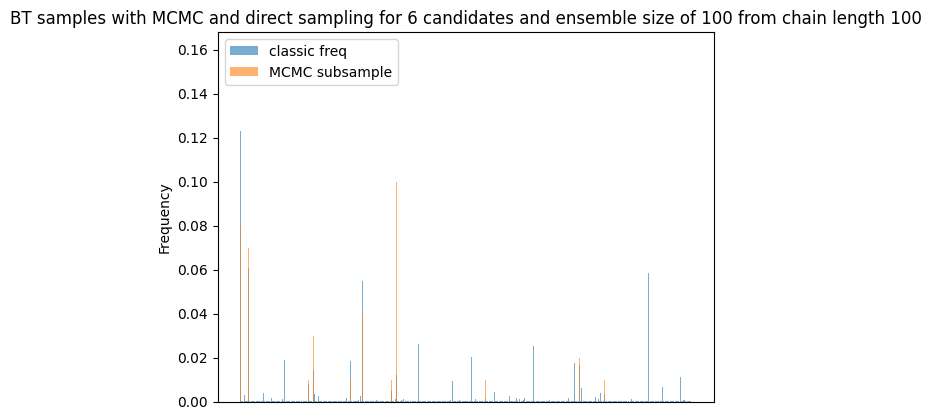

The TV for chain length 100 and subsample size 100 is 0.494786.


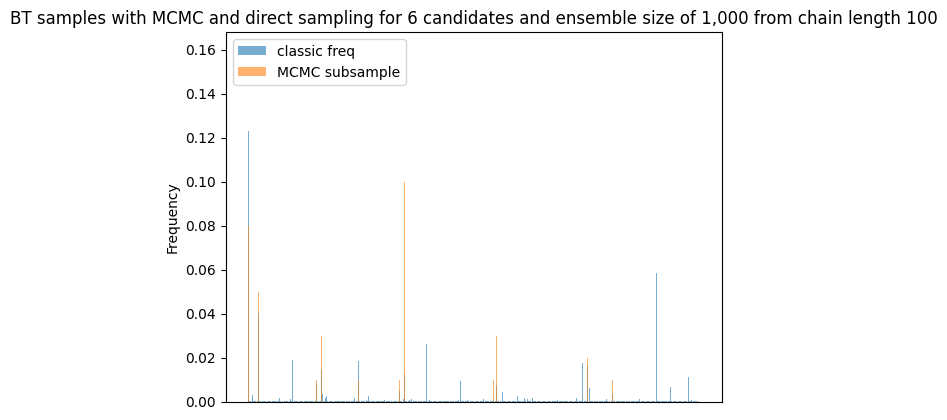

The TV for chain length 100 and subsample size 1000 is 0.494786.


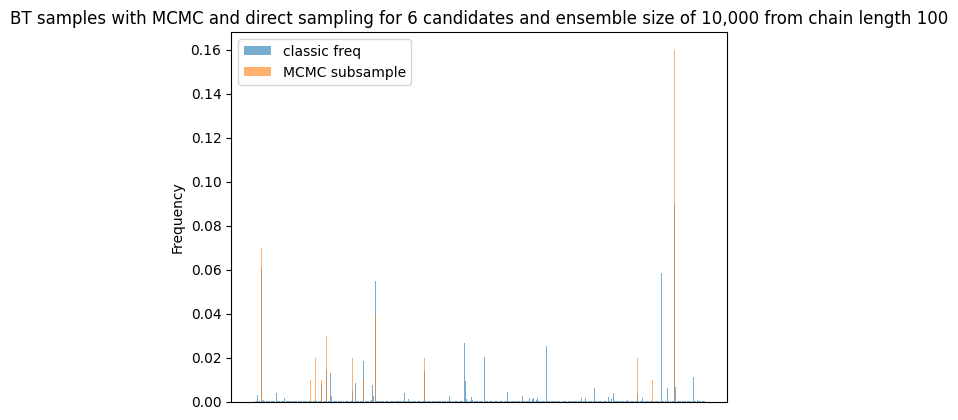

 17%|████████████████████▏                                                                                                    | 1/6 [00:02<00:14,  2.90s/it]

The TV for chain length 100 and subsample size 10000 is 0.494786.


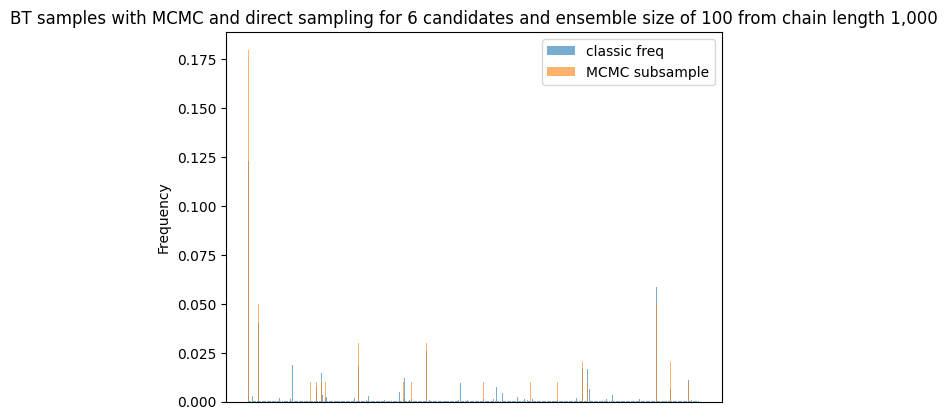

The TV for chain length 1000 and subsample size 100 is 0.280963.


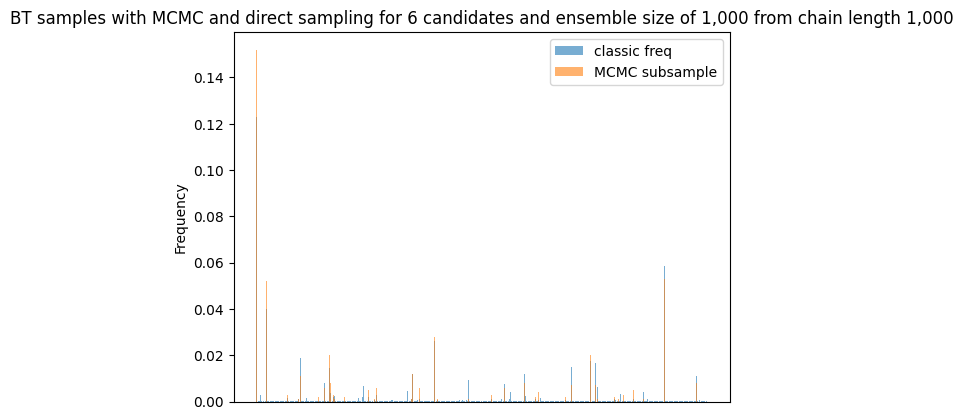

The TV for chain length 1000 and subsample size 1000 is 0.172477.


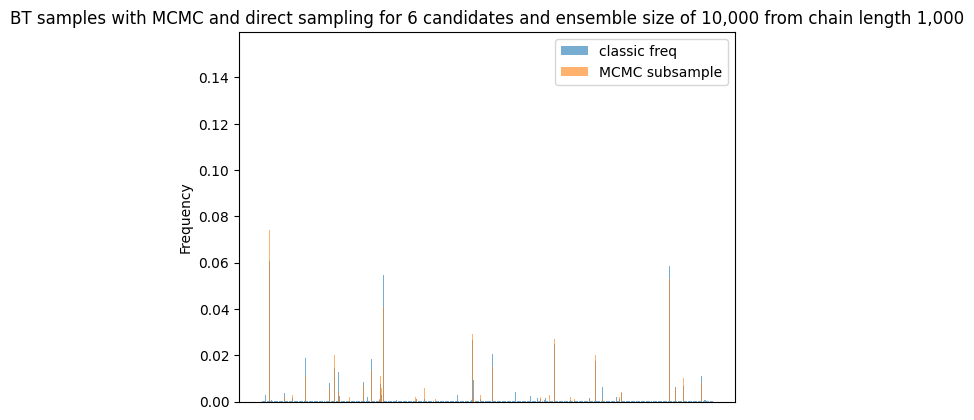

 33%|████████████████████████████████████████▎                                                                                | 2/6 [00:05<00:11,  2.91s/it]

The TV for chain length 1000 and subsample size 10000 is 0.172477.


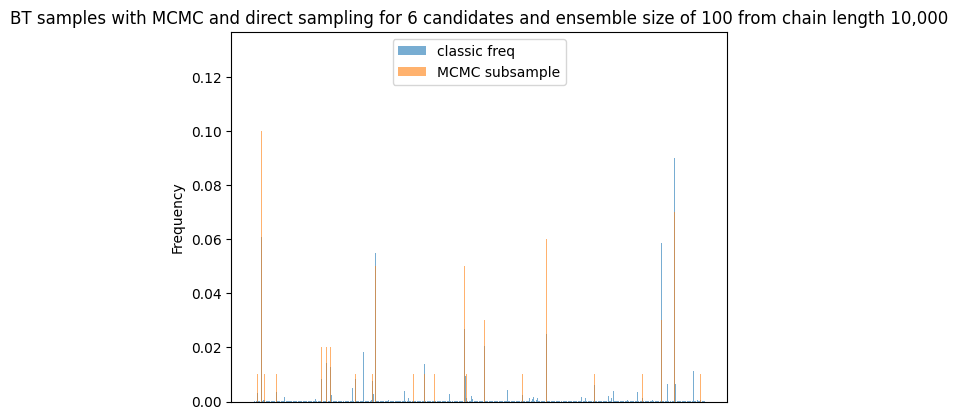

The TV for chain length 10000 and subsample size 100 is 0.310651.


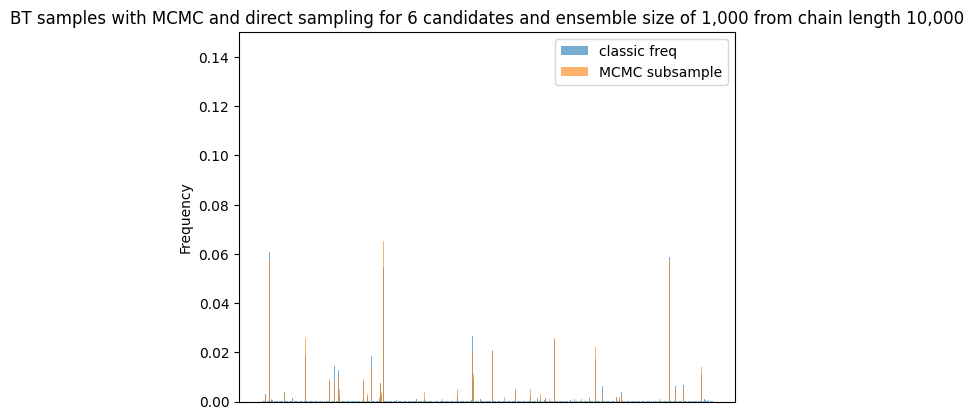

The TV for chain length 10000 and subsample size 1000 is 0.116976.


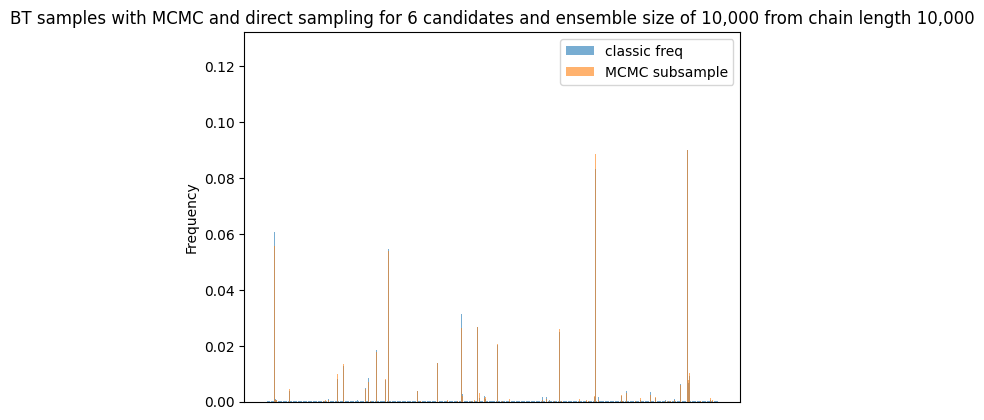

 50%|████████████████████████████████████████████████████████████▌                                                            | 3/6 [00:09<00:09,  3.21s/it]

The TV for chain length 10000 and subsample size 10000 is 0.058362.


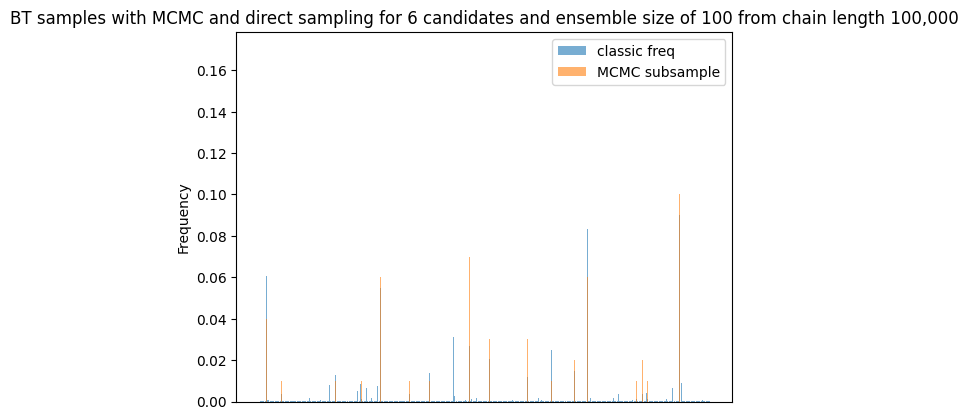

The TV for chain length 100000 and subsample size 100 is 0.324579.


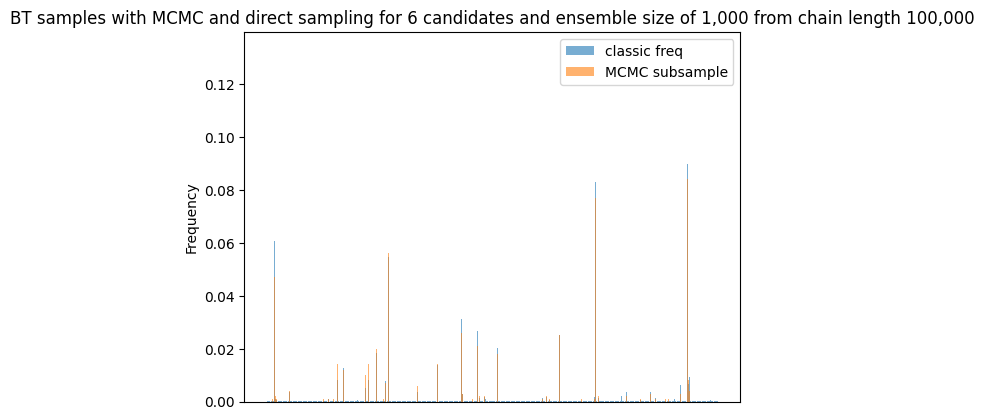

The TV for chain length 100000 and subsample size 1000 is 0.100357.


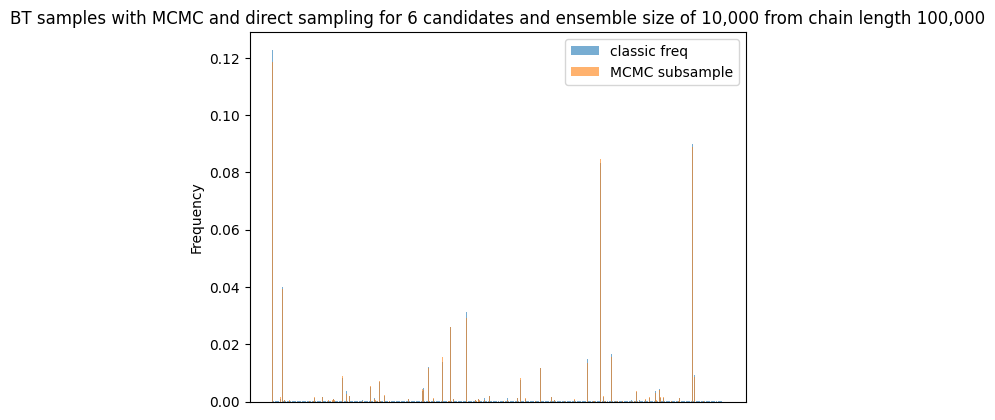

 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 4/6 [00:14<00:08,  4.02s/it]

The TV for chain length 100000 and subsample size 10000 is 0.033121.


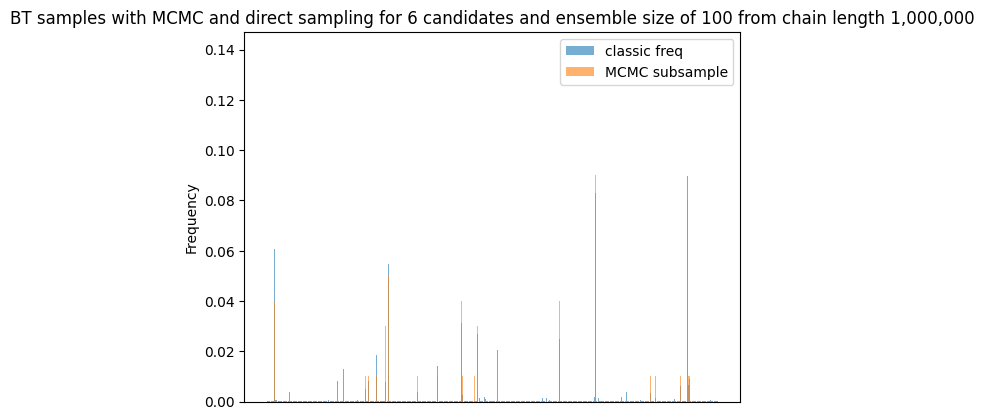

The TV for chain length 1000000 and subsample size 100 is 0.259560.


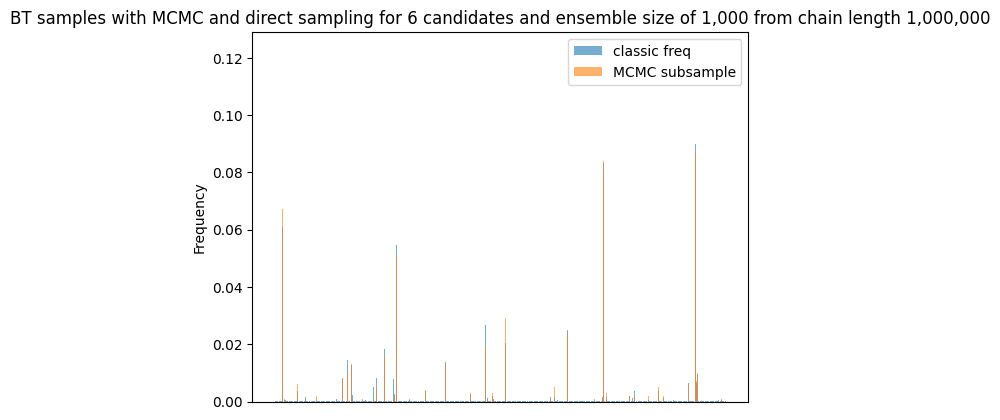

The TV for chain length 1000000 and subsample size 1000 is 0.096669.


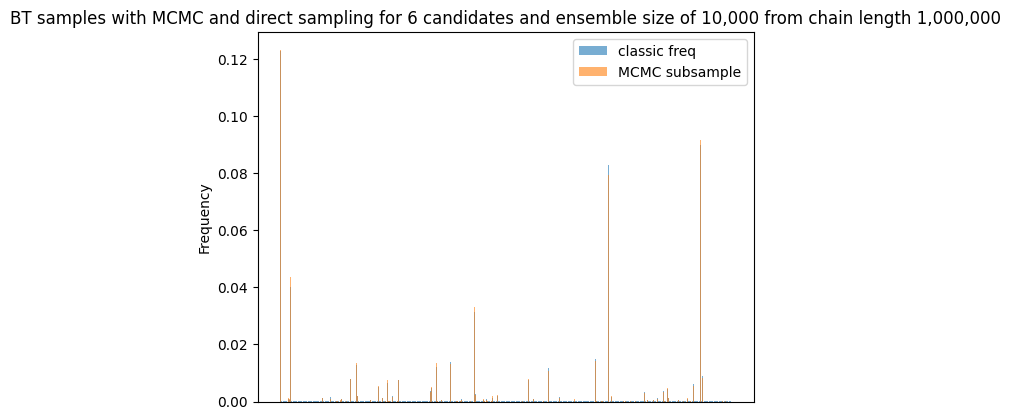

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 5/6 [00:40<00:11, 11.97s/it]

The TV for chain length 1000000 and subsample size 10000 is 0.033293.


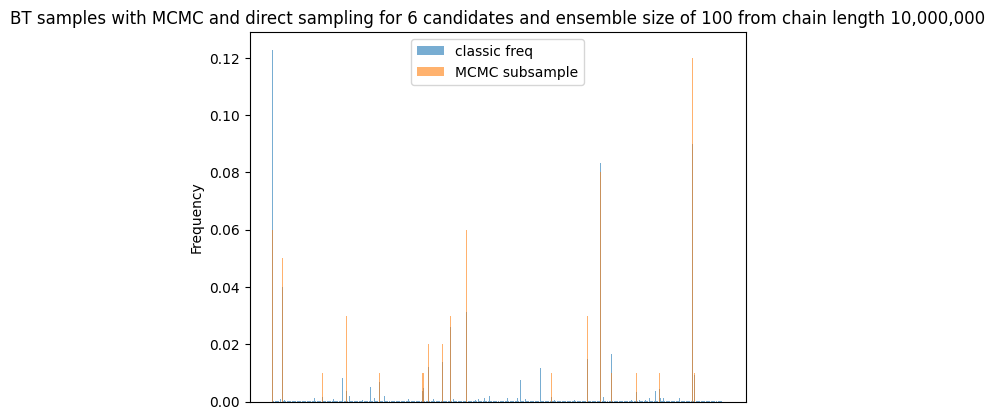

The TV for chain length 10000000 and subsample size 100 is 0.266901.


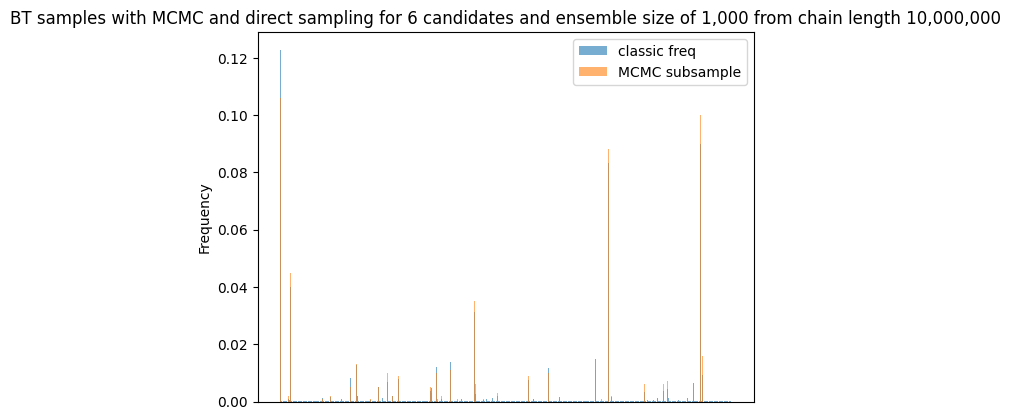

The TV for chain length 10000000 and subsample size 1000 is 0.102886.


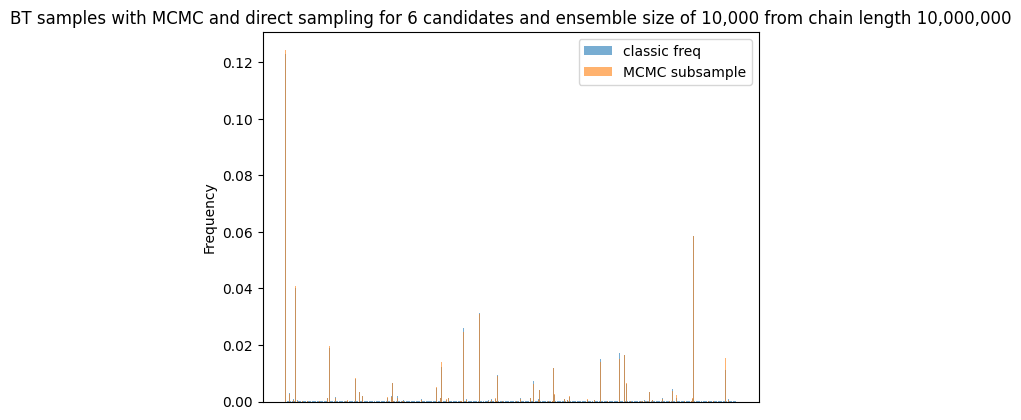

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [07:05<00:00, 71.00s/it]

The TV for chain length 10000000 and subsample size 10000 is 0.029146.


In [34]:
results_6_cands = np.zeros((len(num_ballots_arr), len(size_of_ensembles)))
for k in tqdm(range(len(num_ballots_arr))):
    bals_BT_MCMC_all_samples_ballots = bt.generate_profile_MCMC_arr_ballots(num_ballots_arr[k])
    for j in range(len(size_of_ensembles)):
        # Subsample 
        bals_BT_MCMC_subsample_ballots = [bals_BT_MCMC_all_samples_ballots[i*num_ballots_arr[k]//size_of_ensembles[j] + num_ballots_arr[k]//(2*size_of_ensembles[j])] for i in range(size_of_ensembles[j])]

        # Convert back to PreferenceProfile object 
        bals_BT_MCMC_subsample = PreferenceProfile(ballots=bals_BT_MCMC_subsample_ballots).group_ballots()

        # Transform subsample so labels are well defined 
        ballot_rankings_MCMC_subsample = [bal.ranking for bal in bals_BT_MCMC_subsample.ballots]
        bal_labels_MCMC_subsample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_subsample]
        bal_weights_MCMC_subsample = [int(bal.weight) for bal in bals_BT_MCMC_subsample.ballots]

        bal_rankings_map_MCMC_subsample = {bal_labels_MCMC_subsample[i]: bal_weights_MCMC_subsample[i]/size_of_ensembles[j] for i in range(len(ballot_rankings_MCMC_subsample))}
        
        x_labels = list(new_ranking.keys())
        # TODO: Some redundancy here, simplify
        all_keys = [list(m.keys()) for m in [
            new_ranking, bal_rankings_map_MCMC_subsample
        ]]
        flattened_keys = [k for sublist in all_keys for k in sublist]
        
        for key in flattened_keys:
            new_ranking.setdefault(key, 0) 
            bal_rankings_map_MCMC_subsample.setdefault(key, 0)
        
        all_keys = list(set(new_ranking) | set(bal_rankings_map_MCMC_subsample))

        results_6_cands[k][j] = total_variation_distance(new_ranking, bal_rankings_map_MCMC_subsample, all_keys)

        if verbose: 
            plt.bar(all_keys, [new_ranking[k] for k in all_keys], label="classic freq", alpha=0.6)
            plt.bar(all_keys, [bal_rankings_map_MCMC_subsample[k] for k in all_keys], label="MCMC subsample", alpha=0.6)
            # plt.xticks(rotation=45, ha='right', fontsize=6)
            plt.xticks([]) # Hide the x labels if there are too many candidates to display
            plt.legend()
            plt.ylabel("Frequency")
            plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and ensemble size of {size_of_ensembles[j]:,} from chain length {num_ballots_arr[k]:,}")
            plt.show()
            print(f'The TV for chain length {num_ballots_arr[k]} and subsample size {size_of_ensembles[j]} is {results_6_cands[k][j]:2f}.')

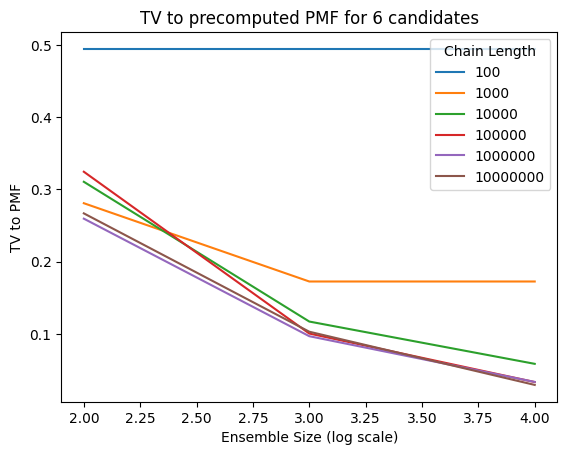

In [36]:
for i in range(len(num_ballots_arr)):
    plt.plot([math.log10(j) for j in size_of_ensembles], results_6_cands[i][::], label = f'{num_ballots_arr[i]}')
plt.xlabel('Ensemble Size (log scale)')
plt.ylabel(f'TV to PMF')
plt.title(f'TV to precomputed PMF for {n_cands} candidates')
legend = plt.legend()
legend.set_title('Chain Length')
plt.show()

In [7]:
num_ballots = 100

In [6]:
# Generate all the ballots
# bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()
bals_BT_MCMC_all_samples_ballots = bt.generate_profile_MCMC_arr_ballots(num_ballots)

In [7]:
# Subsample 
bals_BT_MCMC_subsample_ballots = [bals_BT_MCMC_all_samples_ballots[i*num_ballots//size_of_ensemble + num_ballots//(2*size_of_ensemble)] for i in range(size_of_ensemble)]

In [8]:
# Convert back to PreferenceProfile object 
bals_BT_MCMC_subsample = PreferenceProfile(ballots=bals_BT_MCMC_subsample_ballots).group_ballots()

In [ ]:
## TODO: Replace classic pdf w/ the precomputed pdf rather than the sampling of the pdf

Text(0.5, 1.0, 'BT samples with MCMC and direct sampling for 5 candidates and 10,000 ballots')

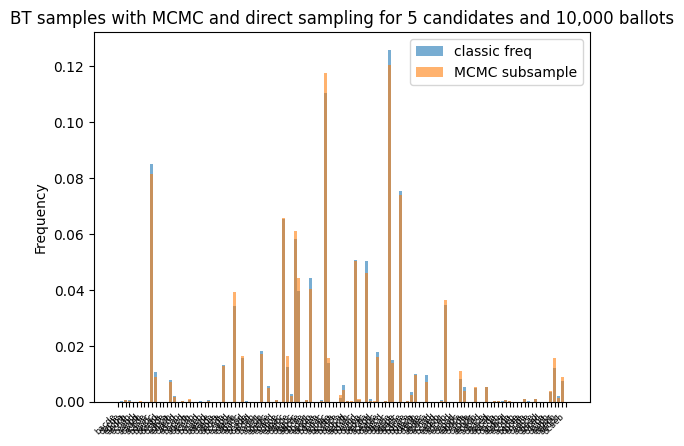

In [9]:
# ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
# bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
# bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

ballot_rankings_MCMC_subsample = [bal.ranking for bal in bals_BT_MCMC_subsample.ballots]
bal_labels_MCMC_subsample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_subsample]
bal_weights_MCMC_subsample = [int(bal.weight) for bal in bals_BT_MCMC_subsample.ballots]

# map ballots to weights for each method
# bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC_subsample = {bal_labels_MCMC_subsample[i]: bal_weights_MCMC_subsample[i]/size_of_ensemble for i in range(len(ballot_rankings_MCMC_subsample))}
# convert the bt instance pdfs to a viz-able form

# print(bal_rankings_map_classic)
# x_labels = list(bal_rankings_map_classic.keys())
x_labels = list(new_ranking.keys())

all_keys = [list(m.keys()) for m in [
    new_ranking, bal_rankings_map_MCMC_subsample
]]
flattened_keys = [k for sublist in all_keys for k in sublist]

for key in flattened_keys:
    new_ranking.setdefault(key, 0) 
    bal_rankings_map_MCMC_subsample.setdefault(key, 0)

all_keys = list(set(new_ranking) | set(bal_rankings_map_MCMC_subsample))

#plt.bar(all_keys, [bal_rankings_map_MCMC[k] for k in all_keys], label="MCMC freq")
#plt.bar(all_keys, [bal_rankings_map_MCMC_shortcut[k] for k in all_keys], label="MCMC shortcut freq", alpha=0.6)
plt.bar(all_keys, [new_ranking[k] for k in all_keys], label="classic freq", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_MCMC_subsample[k] for k in all_keys], label="MCMC subsample", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and {num_ballots:,} ballots")

In [28]:
total_variation_distance(new_ranking, bal_rankings_map_MCMC_subsample, all_keys)

np.float64(0.016945964130184735)

In [ ]:
results = np.empty((len(), len()))

In [66]:
bal_weights_MCMC_subsample

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
PreferenceProfile(ballots=bals_BT_MCMC_all_samples).group_ballots()

Profile contains rankings: True
Maximum ranking length: 5
Profile contains scores: False
Candidates: ('e', 'c', 'd', 'b', 'a')
Candidates who received votes: ('c', 'd', 'b', 'e', 'a')
Total number of Ballot objects: 4
Total weight of Ballot objects: 5.0

In [7]:
bals_BT_MCMC_all_samples

[Ranking
 1.) e, 
 2.) c, 
 3.) d, 
 4.) b, 
 5.) a, 
 Weight: 1.0,
 Ranking
 1.) e, 
 2.) d, 
 3.) c, 
 4.) b, 
 5.) a, 
 Weight: 1.0,
 Ranking
 1.) e, 
 2.) c, 
 3.) d, 
 4.) b, 
 5.) a, 
 Weight: 1.0,
 Ranking
 1.) e, 
 2.) d, 
 3.) c, 
 4.) b, 
 5.) a, 
 Weight: 1.0,
 Ranking
 1.) d, 
 2.) e, 
 3.) c, 
 4.) b, 
 5.) a, 
 Weight: 1.0]

In [18]:
# run BT both ways and then process the differences
num_ballots = 100#int(10e5)
k = 10000
#chain_length = int(10e3)
bals_BT_classic = bt.generate_profile(num_ballots).group_ballots()
#bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False)
bals_BT_MCMC = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=False).group_ballots()
bals_BT_MCMC_shortcut = bt.generate_profile_MCMC(num_ballots, verbose=False, on_shortcut_graph=True).group_ballots()
bals_BT_MCMC_subsample = bt.generate_profile_MCMC_even_subsample(num_ballots, verbose=False).group_ballots()

# Number of bal

TypeError: name_BradleyTerry.generate_profile_MCMC_even_subsample() missing 1 required positional argument: 'chain_length'

In [127]:
ballot_rankings_MCMC = [bal.ranking for bal in bals_BT_MCMC.ballots]
bal_labels_MCMC = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC]
bal_weights_MCMC = [int(bal.weight) for bal in bals_BT_MCMC.ballots]

ballot_rankings_MCMC_shortcut = [bal.ranking for bal in bals_BT_MCMC_shortcut.ballots]
bal_labels_MCMC_shortcut = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_shortcut]
bal_weights_MCMC_shortcut = [int(bal.weight) for bal in bals_BT_MCMC_shortcut.ballots]

ballot_rankings_classic = [bal.ranking for bal in bals_BT_classic.ballots]
bal_labels_classic = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_classic]
bal_weights_classic = [int(bal.weight) for bal in bals_BT_classic.ballots]

ballot_rankings_MCMC_subsample = [bal.ranking for bal in bals_BT_MCMC_subsample.ballots]
bal_labels_MCMC_subsample = ["".join([list(cand)[0] for cand in ranking]) for ranking in ballot_rankings_MCMC_subsample]
bal_weights_MCMC_subsample = [int(bal.weight) for bal in bals_BT_MCMC_subsample.ballots]

print(bal_labels_classic == bal_labels_MCMC) # labels not in the same order, so set up a map 

# map ballots to weights for each method
bal_rankings_map_classic = {bal_labels_classic[i]: bal_weights_classic[i]/num_ballots for i in range(len(ballot_rankings_classic))}
bal_rankings_map_MCMC = {bal_labels_MCMC[i]: bal_weights_MCMC[i]/num_ballots for i in range(len(ballot_rankings_MCMC))}
bal_rankings_map_MCMC_shortcut = {bal_labels_MCMC_shortcut[i]: bal_weights_MCMC_shortcut[i]/num_ballots for i in range(len(ballot_rankings_MCMC_shortcut))}
bal_rankings_map_MCMC_subsample = {bal_labels_MCMC_subsample[i]: bal_weights_MCMC_subsample[i]/num_ballots for i in range(len(ballot_rankings_MCMC_subsample))}
# convert the bt instance pdfs to a viz-able form

# print(bal_rankings_map_classic)
x_labels = list(bal_rankings_map_classic.keys())

all_keys = [list(m.keys()) for m in [
    bal_rankings_map_classic, bal_rankings_map_MCMC, bal_rankings_map_MCMC_shortcut, bal_rankings_map_MCMC_subsample
]]
flattened_keys = [k for sublist in all_keys for k in sublist]

for key in flattened_keys:
    bal_rankings_map_classic.setdefault(key, 0) 
    bal_rankings_map_MCMC.setdefault(key, 0) 
    bal_rankings_map_MCMC_shortcut.setdefault(key, 0) 
    bal_rankings_map_MCMC_subsample.setdefault(key, 0)

all_keys = list(set(bal_rankings_map_classic) | set(bal_rankings_map_MCMC) | set(bal_rankings_map_MCMC_shortcut) | set(bal_rankings_map_MCMC_subsample))

#plt.bar(all_keys, [bal_rankings_map_MCMC[k] for k in all_keys], label="MCMC freq")
#plt.bar(all_keys, [bal_rankings_map_MCMC_shortcut[k] for k in all_keys], label="MCMC shortcut freq", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_classic[k] for k in all_keys], label="classic freq", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_MCMC_subsample[k] for k in all_keys], label="MCMC subsample", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and {num_ballots:,} ballots")

NameError: name 'bals_BT_MCMC' is not defined

In [15]:
total_variation_distance(bal_rankings_map_classic, bal_rankings_map_MCMC_subsample, all_keys)

0.13

Text(0.5, 1.0, 'BT samples with MCMC and direct sampling for 5 candidates and 100 ballots')

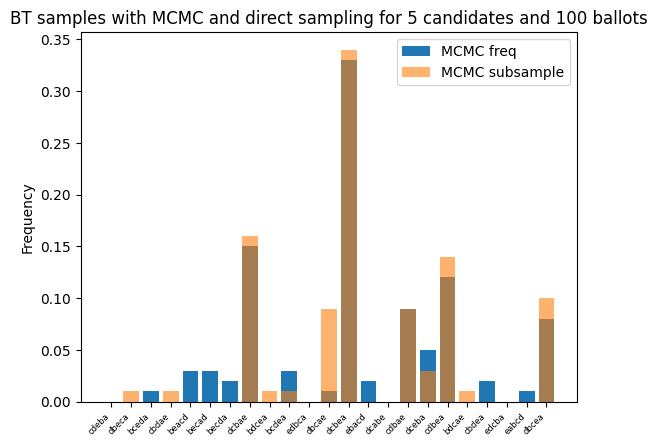

In [14]:
plt.bar(all_keys, [bal_rankings_map_MCMC[k] for k in all_keys], label="MCMC freq")
#plt.bar(all_keys, [bal_rankings_map_classic[k] for k in all_keys], label="classic freq", alpha=0.6)
plt.bar(all_keys, [bal_rankings_map_MCMC_subsample[k] for k in all_keys], label="MCMC subsample", alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.legend()
plt.ylabel("Frequency")
plt.title(f"BT samples with MCMC and direct sampling for {n_cands} candidates and {num_ballots:,} ballots")

In [16]:
total_variation_distance(bal_rankings_map_MCMC, bal_rankings_map_MCMC_subsample, all_keys)

0.18000000000000005